In [37]:
# Import panadas as pd
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
# Download NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# 2. Load dataset
df = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [22]:
print(df.columns)

Index(['Category', 'Message'], dtype='object')


In [23]:
# Clean column names
df = df[['Category', 'Message']]
df.columns = ['label', 'message']

In [24]:
# Preprocess text
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
  text = text.lower()
  text = ''.join([c for c in text if c not in string.punctuation])
  words = text.split()
  words = [stemmer.stem(word) for word in words if word not in stop_words]
  return ' '.join(words)

df['clean_message'] = df['message'].apply(preprocess)

In [25]:
# Convert labels to binary
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

In [26]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['clean_message'],df['label_num'], test_size=0.2, random_state=42)

In [27]:
# Fit on training data only
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [28]:
# Use the same vectorizer to transform test data
X_test_tfidf = vectorizer.transform(X_test)

In [29]:
# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [30]:
# Predict
y_pred = model.predict(X_test_tfidf)

In [43]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 96.68%


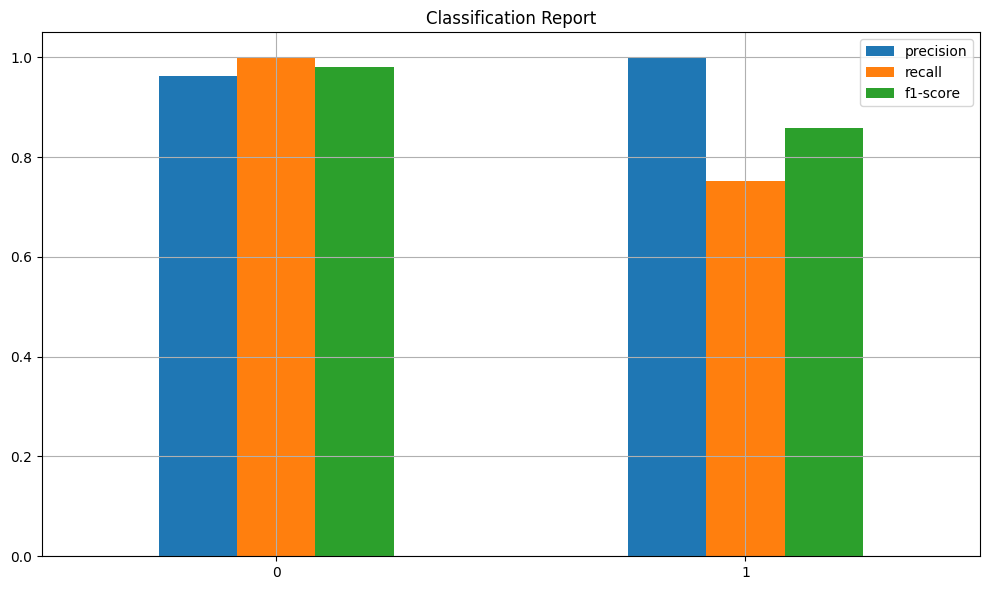

In [44]:

filtered_report = report_df.drop(columns=['support'])

filtered_report.iloc[:-3].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


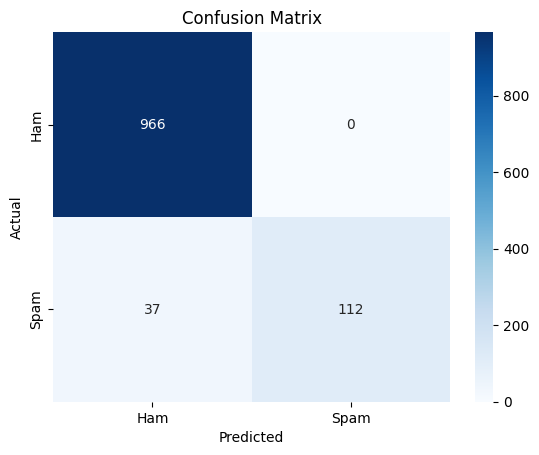

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [41]:
# Test your own email
test_email = "Hello i call you later"
test_email_clean = preprocess(test_email)
test_email_vector = vectorizer.transform([test_email_clean])
prediction = model.predict(test_email_vector)

# Output
if prediction[0] == 1:
    print("This email is SPAM.")
else:
    print("This email is NOT SPAM.")

This email is NOT SPAM.


In [33]:
import joblib

# Save the model
joblib.dump(model, 'spam_classifier_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.
